General imported data where:
  1. **X-axis**: Represents the Country.
  2. **Y-axis:** Represents the Dimension Value (the specific metric being plotted).
  3. **Bars**: Each country will have four bars, one for each GPT model and human evaluation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Tollerance of Ambiguity Test
general_tollerance_of_ambiguity_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Novelty - gpt-3.5-turbo": [3.125, 2.958333333, 2.916666667, 2.875, 3.166666667, 2.958333333, 3.25],
    "Complexity - gpt-3.5-turbo": [5.166666667, 5.3125, 5.125, 5.104166667, 5.4375, 5.5625, 5.354166667],
    "Insolubility - gpt-3.5-turbo": [5.888888889, 5.111111111, 5.777777778, 5.055555556, 5.555555556, 5.333333333, 5.444444444],
    "Novelty - gpt-4-turbo": [4.666666667, 5, 4.666666667, 4.583333333, 4.625, 4.541666667, 4.541666667],
    "Complexity - gpt-4-turbo": [6.125, 6.125, 6.166666667, 6.1875, 6.145833333, 6.104166667, 6.25],
    "Insolubility - gpt-4-turbo": [5.055555556, 5.388888889, 5.111111111, 5.055555556, 5.222222222, 5.222222222, 5.166666667],
    "Novelty - gpt-4o": [5.916666667, 5.125, 5.25, 5.583333333, 5.458333333, 6.125, 5.25],
    "Complexity - gpt-4o": [5.625, 5.666666667, 5.333333333, 5.791666667, 5.6875, 5.666666667, 5.645833333],
    "Insolubility - gpt-4o": [4.944444444, 5, 5.055555556, 4.944444444, 5.055555556, 4.833333333, 5],
    "Novelty - Human": [3.25, 3.25, 3.167, 3.348, 3.469, 3.667, 3.143],
    "Complexity - Human": [3.656, 3.542, 3.388, 3.781, 3.708, 3.313, 3.196],
    "Insolubility - Human": [3.167, 3, 3.026, 3.44, 3.292, 3.222, 3.429]
}

df = pd.DataFrame(general_tollerance_of_ambiguity_data)

In [2]:
def plot_metric_comparison(df, dimension, xlabel, ylabel, title=None):
    """
    Generate a bar plot for a specified dimension type across different models and human evaluation.

    Parameters:
    - df: pd.DataFrame, the DataFrame containing the data.
    - dimension: str, the dimension to plot (e.g., 'Insolubility').
    - xlabel: str, the label for the x-axis.
    - ylabel: str, the label for the y-axis.
    - title: str, optional, the title of the plot.

    Returns:
    - None, displays the plot.
    """
    # Melt the DataFrame to long format
    df_melted = pd.melt(df, id_vars=["Country"], var_name="Dimension", value_name="Value")

    # Split the Metric column to separate model and type
    df_melted[['Dimension Type', 'Model']] = df_melted['Dimension'].str.split(' - ', expand=True)

    # Drop the original Metric column
    df_melted.drop(columns=['Dimension'], inplace=True)

    # Filter the DataFrame to include only the specified metric type
    df_filtered = df_melted[df_melted['Dimension Type'] == dimension]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Create the bar plot for the specified metric
    plt.figure(figsize=(12, 7))
    barplot = sns.barplot(data=df_filtered, x="Country", y="Value", hue="Model")

    for p in barplot.patches:
      height = p.get_height()
      if height != 0:  # Only annotate if the height is not zero
        barplot.annotate(format(height, '.2f'),
        (p.get_x() + p.get_width() / 2., height / 2),  # Center the text vertically
        ha='center', va='center',
        fontsize=10, color='white')

    # Adjust the plot
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title if title else f"{dimension} Comparison Across Different Models and Human Evaluation")
    plt.legend(title="Model", loc='upper right', ncol=1) # Change the attribute loc='best' to improve position of Model
    plt.tight_layout()

    # Show the plot
    plt.show()

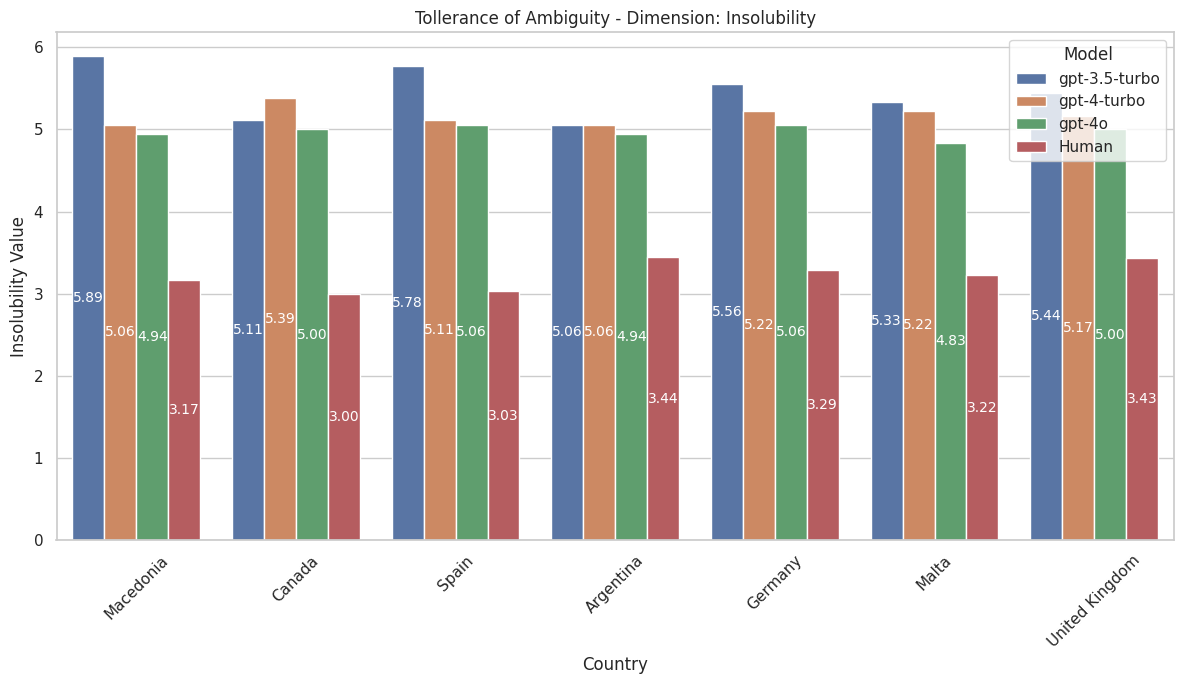

In [6]:
plot_metric_comparison(df, "Insolubility", xlabel="Country", ylabel="Insolubility Value", title="Tollerance of Ambiguity - Dimension: Insolubility")

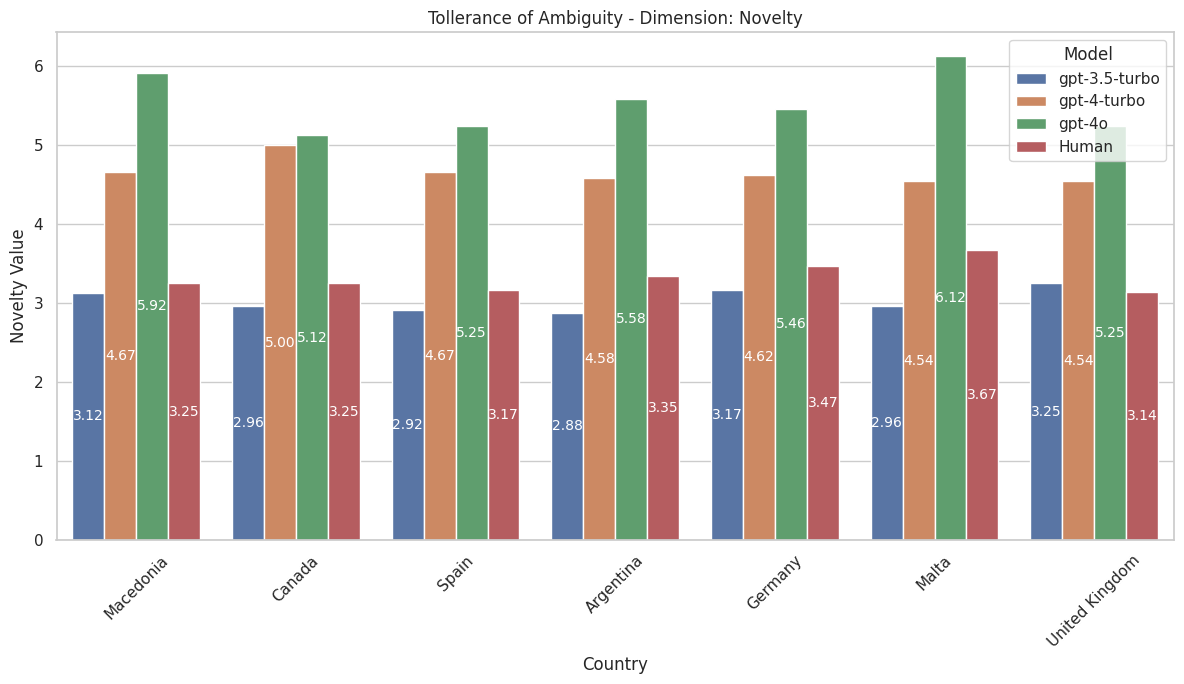

In [7]:
plot_metric_comparison(df, "Novelty", xlabel="Country", ylabel="Novelty Value", title="Tollerance of Ambiguity - Dimension: Novelty")

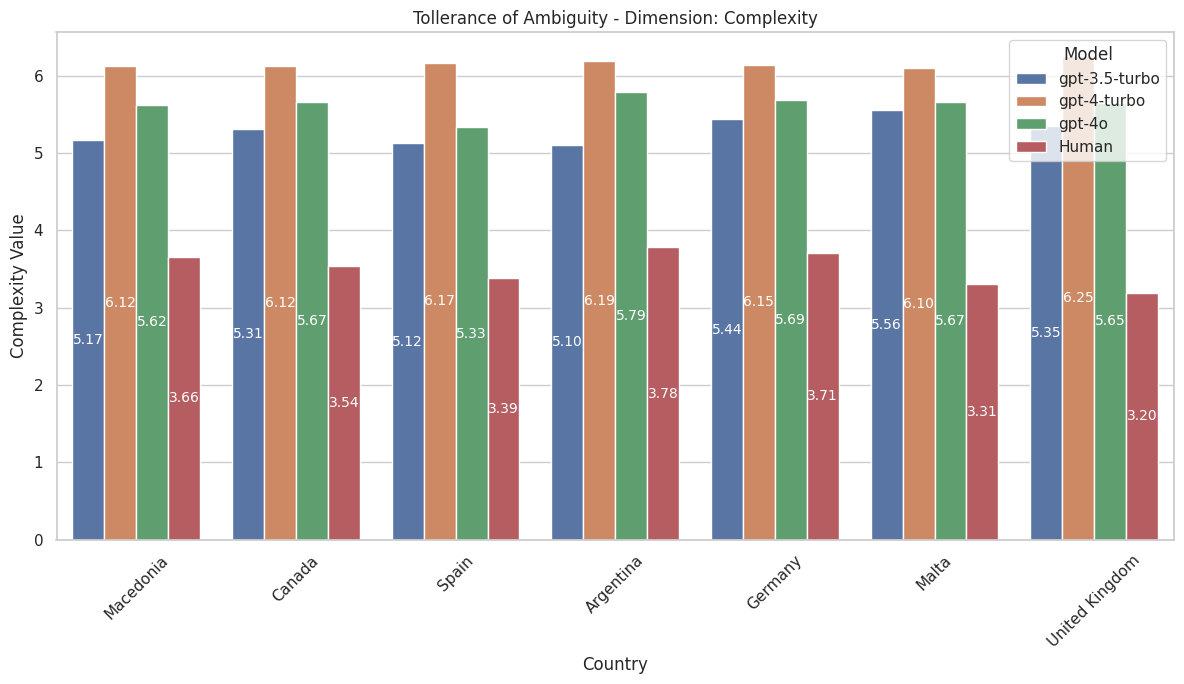

In [8]:
plot_metric_comparison(df, "Complexity", xlabel="Country", ylabel="Complexity Value", title="Tollerance of Ambiguity - Dimension: Complexity")

In [ ]:
# Cognitive Style Test
general_cognitive_style_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Knowing - gpt-3.5-turbo": [4.13, 3.958333333, 4.041666667, 4.083333333, 4.166666667, 4.208333333, 4.041666667],
    "Planning - gpt-3.5-turbo": [4.333333333, 4.285714286, 4.095238095, 4.142857143, 4.452380952, 4.285714286, 4.166666667],
    "Creating - gpt-3.5-turbo": [3.595238096, 3.428571429, 3.404761905, 3.380952381, 3.476190476, 3.833333333, 3.357142857],
    "Knowing - gpt-4-turbo": [4.75, 4.75, 4.75, 4.666666667, 4.916666667, 4.833333333, 4.75],
    "Planning - gpt-4-turbo": [4.952380952, 4.80952381, 4.809523809, 4.928571429, 5, 4.928571429, 4.857142857],
    "Creating - gpt-4-turbo": [4.095148095, 4.190476191, 4.047619048, 4.333333333, 4.071428572, 4.357142857, 4.071428572],
    "Knowing - gpt-4o": [5, 5, 5, 5, 5, 5, 5],
    "Planning - gpt-4o": [5, 5, 5, 5, 5, 4.952380952, 4.976190476],
    "Creating - gpt-4o": [4.095238095, 4.261904762, 4.261904762, 4.261904762, 4.095238095, 4.095238095, 4.214285714],
    "Knowing - Human": [4.473, 4.25, 4.208, 4.188, 3.885, 4.365, 3.571],
    "Planning - Human": [4.413, 4.429, 3.905, 3.964, 3.648, 3.982, 4.184],
    "Creating - Human": [4.097, 3.667, 4.095, 3.786, 3.476, 3.857, 3.918]
}

df = pd.DataFrame(general_cognitive_style_data)

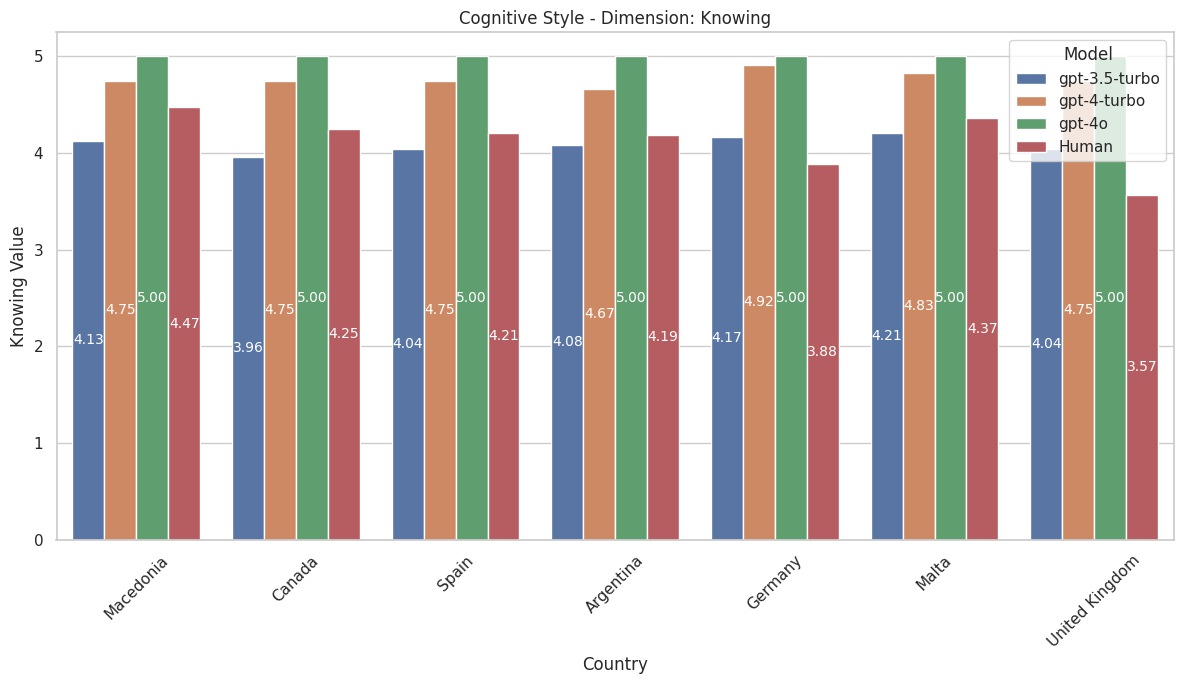

In [ ]:
plot_metric_comparison(df, "Knowing", xlabel="Country", ylabel="Knowing Value", title="Cognitive Style - Dimension: Knowing")

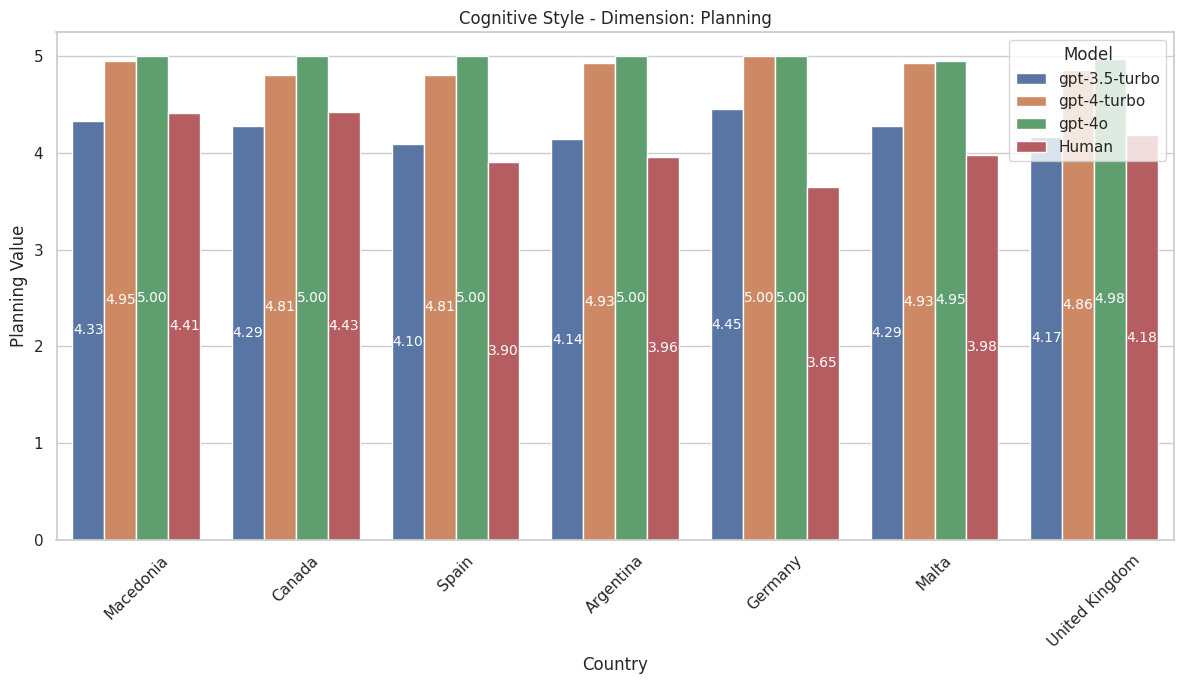

In [ ]:
plot_metric_comparison(df, "Planning", xlabel="Country", ylabel="Planning Value", title="Cognitive Style - Dimension: Planning")

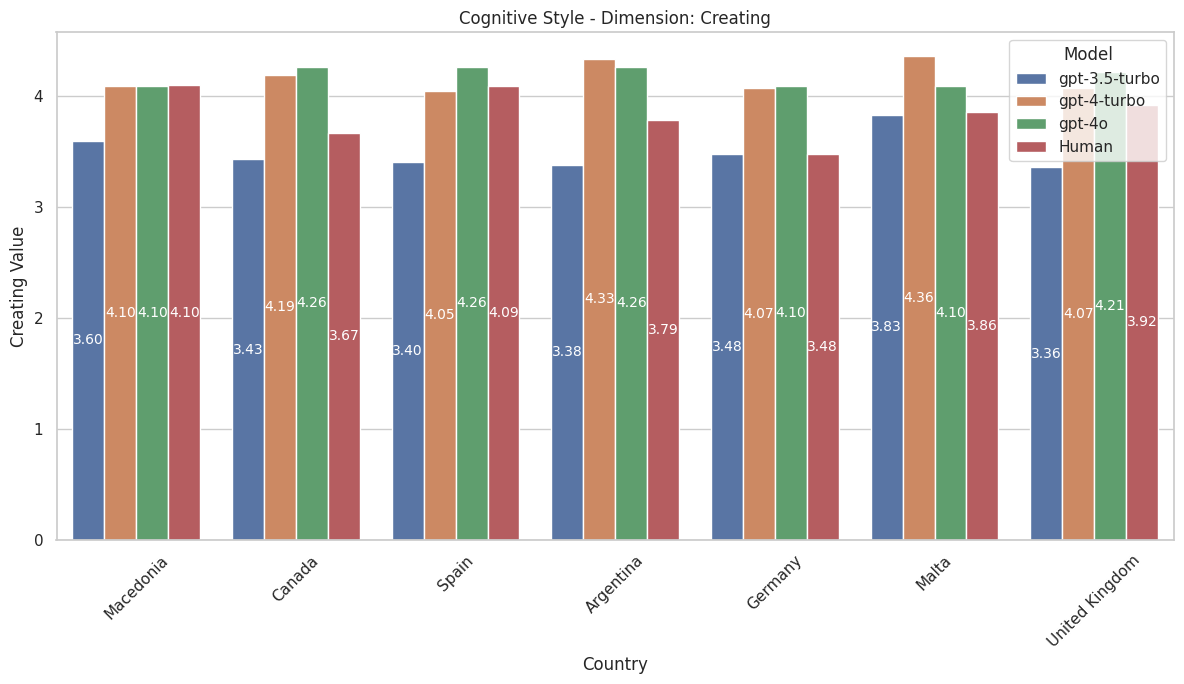

In [ ]:
plot_metric_comparison(df, "Creating", xlabel="Country", ylabel="Creating Value", title="Cognitive Style - Dimension: Creating")

In [7]:
# Innovative Attitude Test

general_innovative_attitude_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Innovative Attitude - gpt-3.5-turbo": [80.66666667, 82.83333333, 80.83333333, 81, 81, 81.33333333, 81.5],
    "Innovative Attitude - gpt-4-turbo": [93.66666667, 94.5, 93.66666667, 93, 91.16666667, 96.66666667, 88.33333333],
    "Innovative Attitude - gpt-4o": [87.66666667, 88.16666667, 89, 87.5, 88.5, 87.5, 87.83333333],
    "Innovative Attitude - Human": [68.75, 83.00, 70.72, 81.21, 76.46, 81.00, 67.71]
}

df = pd.DataFrame(general_innovative_attitude_data)

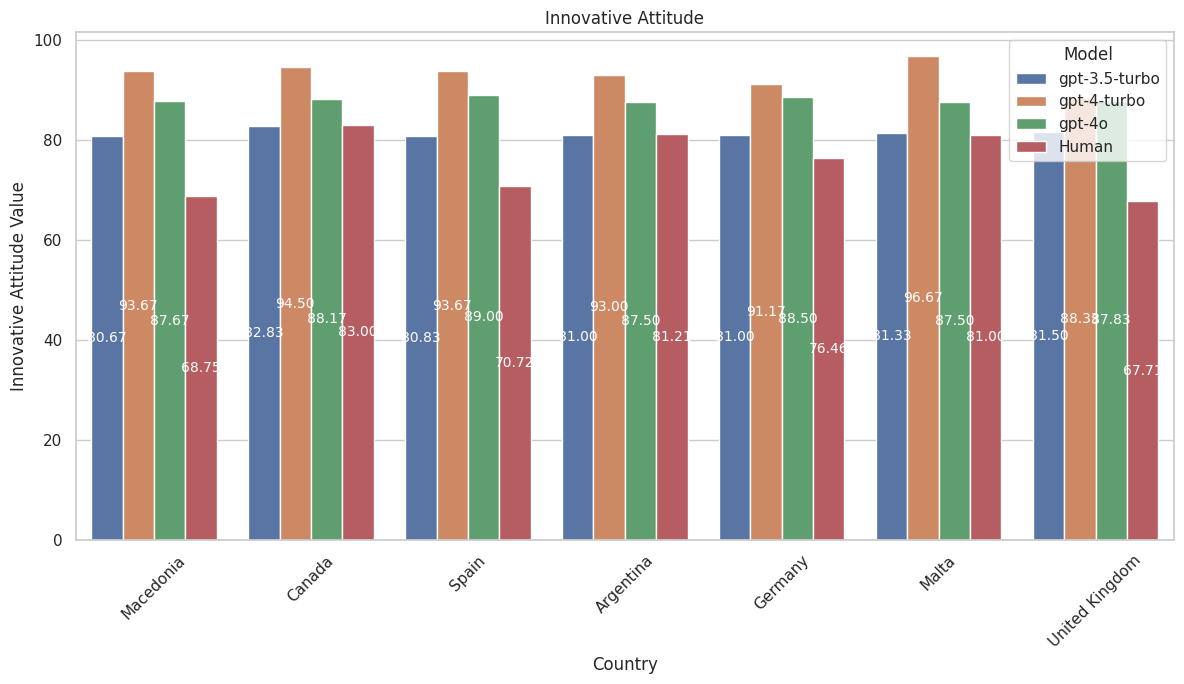

In [8]:
plot_metric_comparison(df, "Innovative Attitude", xlabel="Country", ylabel="Innovative Attitude Value", title="Innovative Attitude")

In [3]:
# Emotional Intelligence Test

general_emotional_intelligence_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Emotional Response - gpt-3.5-turbo": [26.66666667, 28.33333333, 28.33333333, 26.66666667, 28.33333333, 28.33333333, 26.66666667],
    "Emotional Response - gpt-4-turbo": [20, 16.66666667, 20, 20, 20, 20, 16.66666667],
    "Emotional Response - gpt-4o": [28.33333333, 30, 30, 30, 28.33333333, 28.33333333, 30],
    "Emotional Response - Human": [19.75, 21.00, 16.44, 19.68, 20.63, 19.50, 13.00]
}

df = pd.DataFrame(general_emotional_intelligence_data)

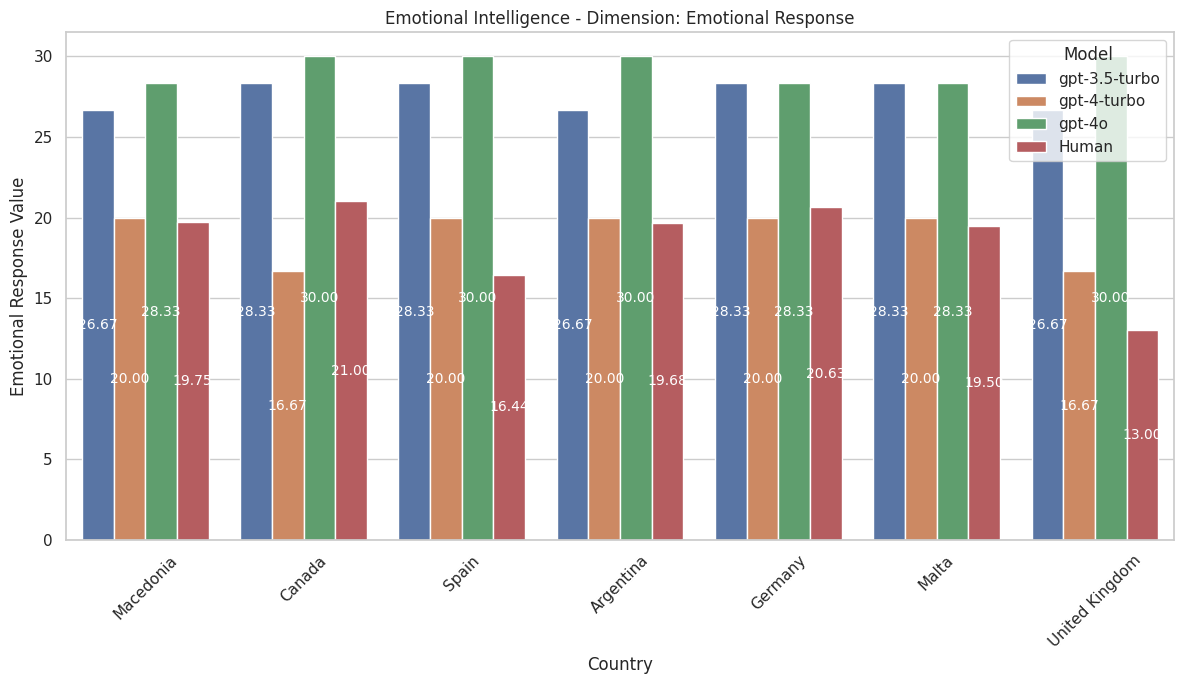

In [4]:
plot_metric_comparison(df, "Emotional Response", xlabel="Country", ylabel="Emotional Response Value", title="Emotional Intelligence - Dimension: Emotional Response")

In [5]:
# Locus of Control Test

general_locus_of_control_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Locus of Control - gpt-3.5-turbo": [5.5, 4.833333333, 4.833333333, 4.833333333, 4.833333333, 5.166666667, 5],
    "Locus of Control - gpt-4-turbo": [1.166666667, 0.5, 1, 0.833333333, 0.833333333, 0.666666667, 0.833333333],
    "Locus of Control - gpt-4o": [1, 1, 1, 1, 1, 0.833333333, 0.833333333],
    "Locus of Control - Human": [7.25, 3.333, 7.795, 6.036, 7.292, 6.167, 9.429]
}

df = pd.DataFrame(general_locus_of_control_data)

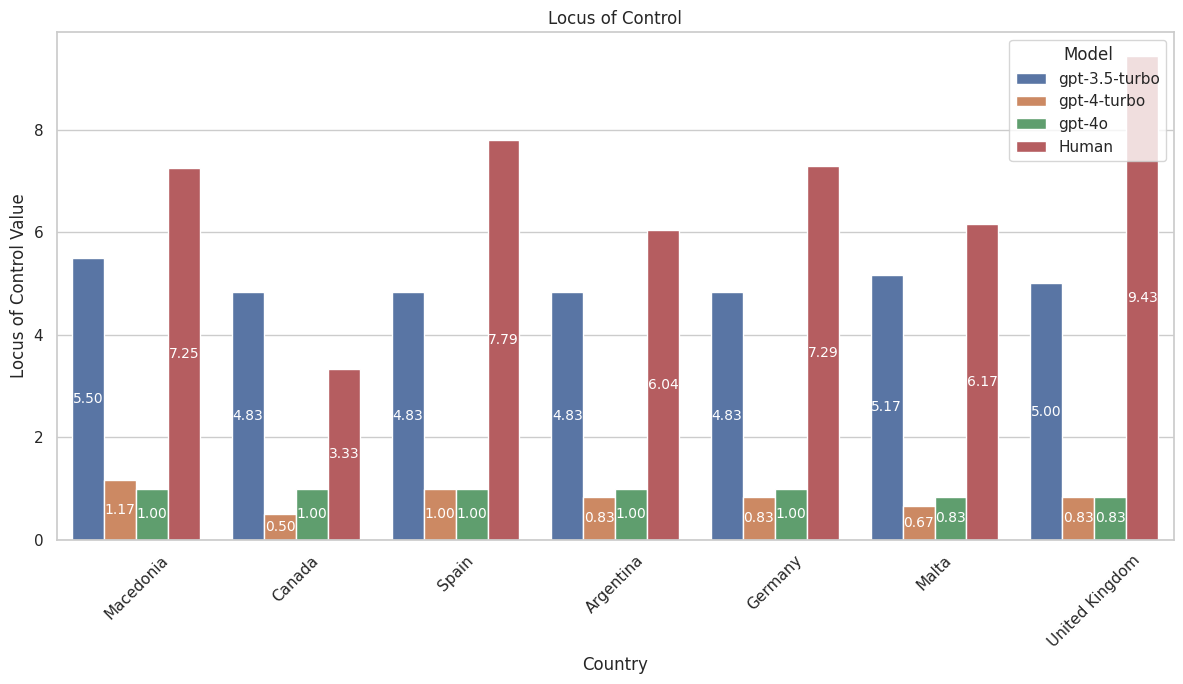

In [6]:
plot_metric_comparison(df, "Locus of Control", xlabel="Country", ylabel="Locus of Control Value", title="Locus of Control")

Imported data for Work Position: Project Manager for all countries where:
1. **X-axis**: Represents the Work Position by Country.
2. **Y-axis**: Represents the Dimension Value (the specific dimension being plotted).
3. **Bars**: Each record on x-axis will have three bars, one for each GPT model used

In [3]:
# Tollerance of Ambiguity
projectManager_country = {
    "Country": ["Project Manager Macedonia", "Project Manager Canada", "Project Manager Spain", "Project Manager Argentina" , "Project Manager Germany" , "Project Manager Malta", "Project Manager UK"],
    "Novelty - gpt-3.5-turbo": [3, 3, 3.25, 3.5, 3, 3, 3],
    "Novelty - gpt-4-turbo": [4.75, 4.5, 4.75, 4.5, 4.75, 4.75, 4.5],
    "Novelty - gpt-4o": [5, 5.25, 5.5, 5.5, 6, 6, 5.25],

    "Complexity - gpt-3.5-turbo": [5.25, 5.5, 5.375, 5.25, 5.5, 6.25, 5.5],
    "Complexity - gpt-4-turbo":[6, 5.625, 6.375, 6.125, 5.875, 6.125, 6.25],
    "Complexity - gpt-4o": [5.75, 5.75, 5.75, 5.75, 5.5, 5.625, 5.625],

    "Insolubility - gpt-3.5-turbo" : [6.333333333, 5.333333333 , 5.333333333 , 4.333333333 , 5.333333333 , 5.333333333 , 5.333333333 ],
    "Insolubility - gpt-4-turbo" : [4.666666667, 5, 5.666666667, 5, 5, 5, 5.333333333],
    "Insolubility - gpt-4o" : [5.333333333, 5, 5, 5, 5, 5, 5],
}

df = pd.DataFrame(projectManager_country)

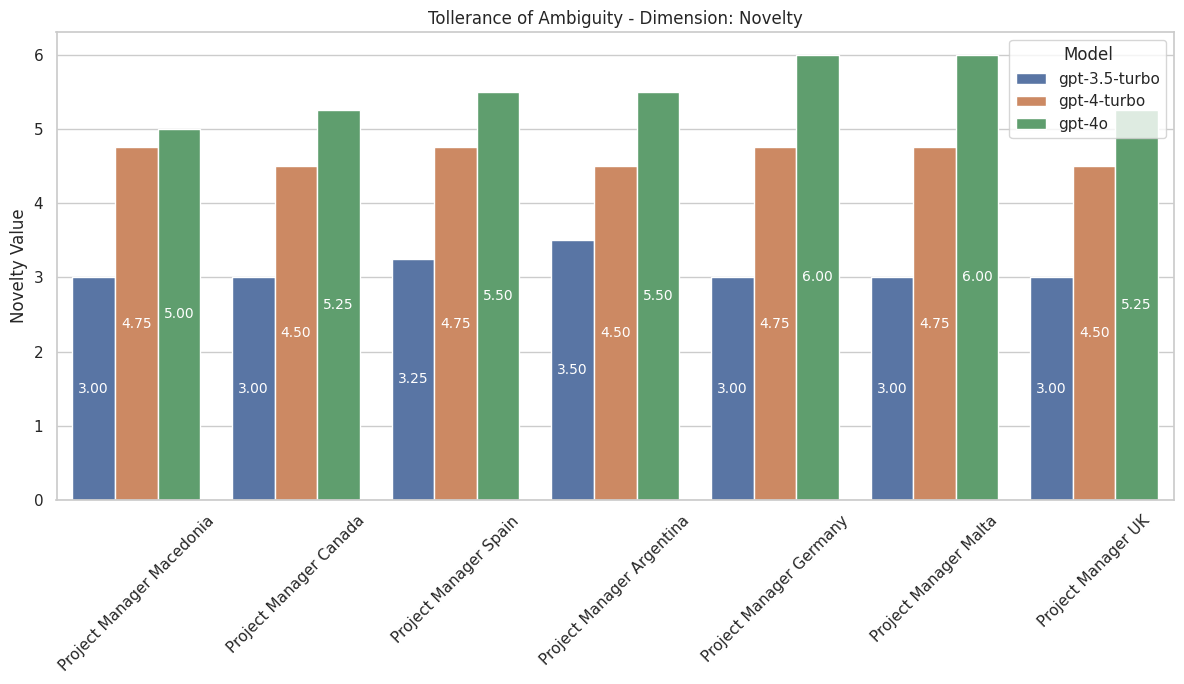

In [4]:
plot_metric_comparison(df, "Novelty", xlabel="", ylabel="Novelty Value", title="Tollerance of Ambiguity - Dimension: Novelty")

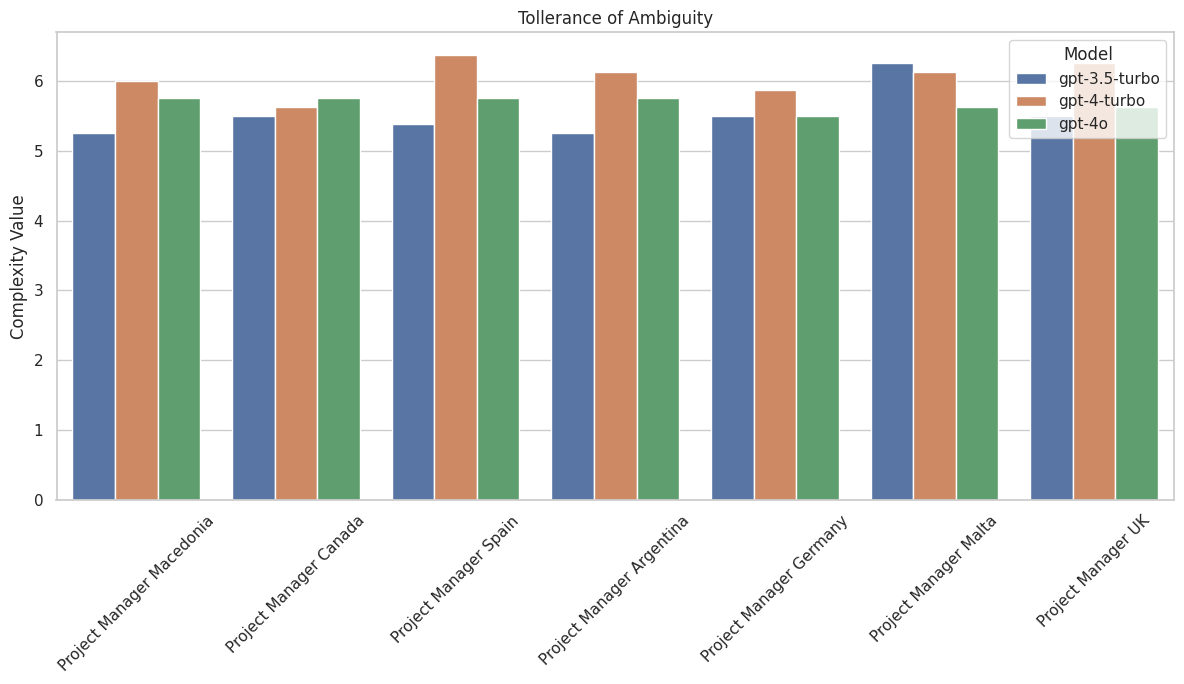

In [ ]:
plot_metric_comparison(df, "Complexity", xlabel="", ylabel="Complexity Value", title="Tollerance of Ambiguity - Dimension: Complexity")

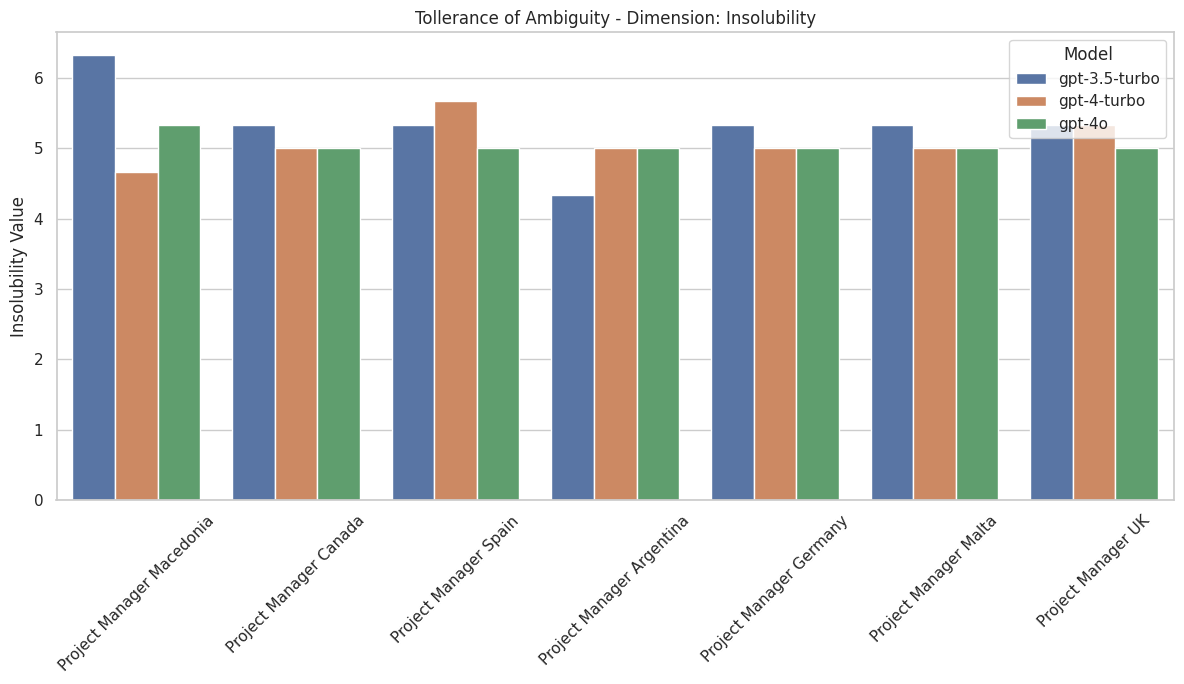

In [ ]:
plot_metric_comparison(df, "Insolubility", xlabel="", ylabel="Insolubility Value", title="Tollerance of Ambiguity - Dimension: Insolubility")